In [1]:
import pandas as pd
from pandas import Series, DataFrame
from datetime import datetime
import numpy as np
from numpy.fft import fft, rfft
from scipy import signal
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm

In [2]:
#% run outils.py # les fonctions perso et les imports
import matplotlib.pyplot as plt
import matplotlib.cm as cm
% matplotlib inline

### Import CSV

In [3]:
dtype = {'Respiration':np.float64, 'GSR':np.float64, 'Temperature':np.float64, 'CFM':np.float64}
data = pd.read_csv('../data/AB.csv', sep = ';', decimal =',', dtype = dtype)

### Conversion des dates, création de la matrice des données

In [4]:
dates = []
for date in data['date']:
    dates.append(datetime.strptime(date, '%d/%m/%Y %H:%M:%S.%f'))
#print(dates[:5])

In [5]:
t = []
for date in dates:
    t.append((date-dates[0]).total_seconds())
time = Series(t, name='t')
#time.head(5)

In [6]:
print("Durée totale de l'expérience en secondes : ", t[-1])

Durée totale de l'expérience en secondes :  1525.063


In [7]:
X = DataFrame(data[['Respiration', 'GSR', 'Temperature', 'CFM']], columns = ['t', 'Respiration', 'GSR', 'Temperature', 'CFM'])
X['t'] = time
X.head(5)

,t,Respiration,GSR,Temperature,CFM
0,0.000,-10.644,-44.157,29.417,74.0
1,0.031,-10.379,-44.157,29.417,74.0
2,0.063,-10.168,-44.157,29.417,74.0
3,0.094,-9.981,-44.157,29.417,74.0
4,0.125,-9.833,-44.169,29.417,74.0


### Plot

In [8]:
respi = X['Respiration']
respi.index = X['t']

In [9]:
GSR = X['GSR']
GSR.index = X['t']

In [10]:
temp = X['Temperature']
temp.index = X['t']

In [11]:
CFM = X['CFM']
CFM.index = X['t']

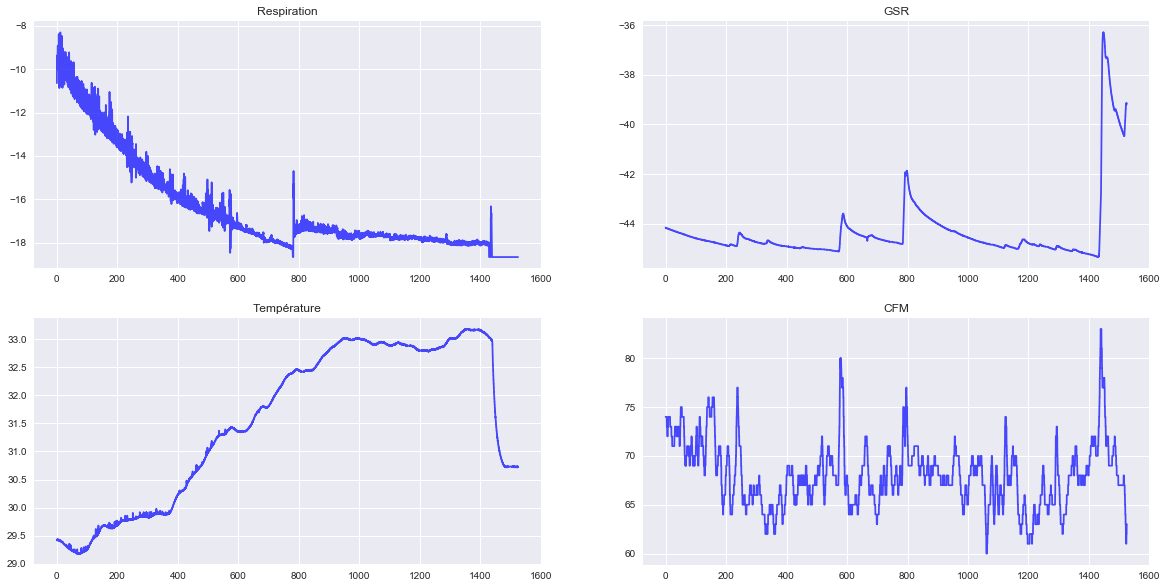

In [12]:
fig = plt.figure(figsize=(20, 10))

ax_respi = fig.add_subplot(221)
ax_GSR = fig.add_subplot(222)
ax_temp = fig.add_subplot(223)
ax_CFM = fig.add_subplot(224)

ax_respi.set_title("Respiration")
ax_GSR.set_title("GSR")
ax_temp.set_title("Température")
ax_CFM.set_title("CFM")

ax_respi.plot(t, respi, color = "Blue", alpha = 0.7)
ax_GSR.plot(t, GSR, color = "Green", alpha = 0.7)
ax_temp.plot(t, temp, color = "Red", alpha = 0.7)
ax_CFM.plot(t, CFM, color = "Grey", alpha = 0.7)